In [586]:
import pandas as pd
import numpy as np
from helper import *

In [587]:
import seaborn as sns

In [588]:
def split_values(x):
    """For attributes that multiple values can represent the missing/unknown, split the value and return a list

    e.g. feature 'ALTERSKATEGORIE_GROB', the unknown is recored as ('-1','0'). 
    by applying this function, the value is transformed to be [-1,0]
    """
    try:
        return [int(a) for a in x.split(',')]
    except:
        return [x]

def unknown_encoding(df_features, search_for): 
    """Extract rules applied in 
    df_features: metadata file
    search_for: nan or missing values encoding
    """
#     search_for = '|'.join(['no transactions', 'unknown'])
    nan_idx = df_features['Meaning'].str.contains(search_for, na=False)

    # values assigned to each attributes when missing or unknow
    df_features_nan = df_features[nan_idx].copy().reset_index(drop=True)
    df_features_nan['Value'] = df_features_nan['Value'].apply(split_values)
    
    return df_features_nan

def unkown_mapping(azdias, df_features_nan):
    """
    Map the unknown/missing value as np.nan
    """

    features_not_in = []
    
    for idx, row in df_features_nan.head(5).iterrows():
        try:
            print(row.Value)
            azdias[row.Attribute].replace(row.Value, np.nan, inplace = True)
        except:
            features_not_in.append(row.Attribute)          
#     print("{:} is not contained in the data".format(features_not_in))
    return azdias

def feature_count(azdias_features):
    print( 'Demographics data file contains {:} features'.format(len(azdias.columns)))

def attribute_meanings(attribute_prefix):
    
    print(df_features.loc[df_features.Attribute.str.contains(attribute_prefix), "Meaning"].unique())

def attribute_group(att):
    return att.split('_')[0]

def del_features(df_feat_summary, feats):
    """Delete features from the summary table 
    """
    idx_to_drop = df_feat_summary[df_feat_summary['Attribute'].isin(feats)].index
    df_feat_summary.drop(idx_to_drop, inplace=True)
    
    return df_feat_summary

def get_features(df_features, prefix):
    """Get all attributes with the same prefix
    """
    feats = df_features.loc[df_features['attribute_prefix'] == prefix, 'Attribute'].unique()
    return feats

In [589]:
def unknown_encoding(df_features, search_for): 
    """Extract rules applied in 
    df_features: metadata file
    search_for: nan or missing values encoding
    """
#     search_for = '|'.join(['no transactions', 'unknown'])
    nan_idx = df_features['Meaning'].str.contains(search_for, na=False)

    # values assigned to each attributes when missing or unknow
    df_features_nan = df_features[nan_idx].copy().reset_index(drop=True)
    df_features_nan['Value'] = df_features_nan['Value'].apply(split_values)
    
    return df_features_nan

In [590]:
def unkown_mapping(azdias, df_features_nan):
    """
    Map the unknown/missing value as np.nan
    """

    features_not_in = []
    
    for idx, row in df_features_nan.iterrows():
        try:
            azdias[row.Attribute].replace(row.Value, np.nan, inplace = True)
        except:
            features_not_in.append(row.Attribute)          
#     print("{:} is not contained in the data".format(features_not_in))
    return azdias

In [591]:
def feature_count(azdias_features):
    print( 'Demographics data file contains {:} features'.format(len(azdias.columns)))

In [592]:
def attribute_meanings(attribute_prefix):
    
    print(df_features.loc[df_features.Attribute.str.contains(attribute_prefix), "Meaning"].unique())

In [593]:
def attribute_group(att):
    return att.split('_')[0]

In [594]:
def del_features(df_feat_summary, feats):
    """Delete features from the summary table 
    """
    idx_to_drop = df_feat_summary[df_feat_summary['Attribute'].isin(feats)].index
    df_feat_summary.drop(idx_to_drop, inplace=True)
    
    return df_feat_summary

In [595]:
def get_features(df_features, prefix):
    """Get all attributes with the same prefix
    """
    feats = df_features.loc[df_features['attribute_prefix'] == prefix, 'Attribute'].unique()
    return feats

## Interpreting metadata

### pre-processing using prefix of the attributes

In [596]:
df_features = pd.read_excel(
    'DIAS Attributes - Values 2017.xlsx', header=[1], usecols=[1, 3, 4], index_col=[0, 1])

df_features = df_features.reset_index()

In [597]:
df_feat_summary = pd.DataFrame()

In [598]:
# data are mostly ordinal. i therefoe pre-assign the data type as ordinal. if it is not, will be updated accordingly. 
df_feat_summary['Attribute'] = df_features.Attribute.unique()
df_feat_summary['type'] = 'ordinal' 

In [599]:
# 
cat_features = []
num_features = []

In [600]:
# Count the sources of features, or the types of features.
top_count_features = df_features.Attribute.drop_duplicates().apply(attribute_group).value_counts().head(10)

In [601]:
df_features['attribute_prefix'] = df_features.Attribute.apply(attribute_group)

In [602]:
# Based on the pre-fix of each data group, we will examine the data for each group. data collected is expected to encoded in a similar manner
top_count_features

KBA13          108
KBA05           65
D19             61
SEMIO           14
PLZ8             7
LP               6
FINANZ           6
ANZ              4
CAMEO            3
GEBAEUDETYP      2
Name: Attribute, dtype: int64

In [603]:
feat_counts = df_features.Attribute.drop_duplicates().count()
print('total number of features is {:}'.format(feat_counts))

feat_anlyzed = top_count_features.sum()
print('by looking into the prefix, we manage to sort out {:} features'.format(feat_anlyzed))

print('There are {:} features outstanding'.format(feat_counts - feat_anlyzed))

total number of features is 314
by looking into the prefix, we manage to sort out 276 features
There are 38 features outstanding


#### D19

In [604]:
# D19 provides informat n about trasaction activities, cat data, mostly np.nan. will be droped in later analysis
# columns kept: D19_KONSUMTYP
d19_attribute_meanings = attribute_meanings('D19')

['no transactions known' 'very low activity' 'low activity'
 'slightly increased activity' 'increased activity' 'high activity'
 'very high activity' 'highest activity within the last 12 months'
 'very high activity within the last 12 months'
 'high activity within the last 12 months'
 'increased activity within the last 12 months'
 'slightly increased activity within the last 12 months'
 'activity elder than 1 year' 'activity elder than 1,5 years'
 'activity elder than 2 years' 'activity elder than 3 years'
 'no transaction known' 'Multibuyer 0-12 months' 'Doublebuyer 0-12 months'
 'Singlebuyer 0-12 months' 'Multi-/Doublebuyer 13-24 months'
 'Singlebuyer 13-24 months' 'Buyer > 24 months' 'Prospects > 24 months'
 'activity elder than 12 months' 'activity elder than 18 months'
 'activity elder than 24 months' 'activity elder than 36 months'
 'no Online-transactions within the last 12 months'
 '10% Online-transactions within the last 12 months'
 '20% Online-transactions within the last 1

D19 data describes the trascation activity. all features, except for "D19_KONSUMTYP" will be treated as ornidal data. "D19_KONSUMTYP" is catgorical. we therefore need to upodate the summary table. 

Missing vlaues or unknows are descrbied either as "no transactions known", or "no transaction known", or 'unknown', or unspecified in the metadata file 

In [605]:
cat_features.extend(['D19_KONSUMTYP'])

#### KBA05

In [606]:
# Family and cars, ordnial information, ordinal data
kba_05_meanings  = attribute_meanings('KBA05') 

['unknown' 'none' 'low' 'average' 'high' 'very high' 'very low' 'some'
 'some more' 'very many' 'no 1-2 family homes'
 'lower share of 1-2 family homes' 'average share of 1-2 family homes'
 'high share of 1-2 family homes' 'very high share of 1-2 family homes'
 'no 3-5 family homes' 'lower share of 3-5 family homes'
 'average share of 3-5 family homes' 'high share of 3-5 family homes'
 'very high share of 3-5 family homes' 'no 6-10 family homes'
 'lower share of 6-10 family homes' 'average share of 6-10 family homes'
 'high share of 6-10 family homes' 'no >10 family homes'
 'lower share of >10 family homes' 'high share of >10 family homes'
 'very low car quote' 'low car quote' 'average car quote' 'high car quote'
 'very high car quote' 'mainly 1-2 family homes in the microcell'
 'mainly 3-5 family homes in the microcell'
 'mainly 6-10 family homes in the microcell'
 'mainly>10 family homes in the microcell'
 'mainly business buildings in the microcell' '1-2 buildings'
 '3-4 buildings' 

KBA05 data describes manily information about house and car the person owns.

In [607]:
for att in ["KBA05_HERSTTEMP", "KBA05_MAXHERST","KBA05_MAXSEG"]:
    display(df_features[df_features.Attribute == att])

,Attribute,Value,Meaning,attribute_prefix
905,KBA05_HERSTTEMP,"-1, 9",unknown,KBA05
906,KBA05_HERSTTEMP,1,promoted,KBA05
907,KBA05_HERSTTEMP,2,stayed upper level,KBA05
908,KBA05_HERSTTEMP,3,stayed lower/average level,KBA05
909,KBA05_HERSTTEMP,4,demoted,KBA05
910,KBA05_HERSTTEMP,5,new building,KBA05


,Attribute,Value,Meaning,attribute_prefix
980,KBA05_MAXHERST,"-1, 9",unknown,KBA05
981,KBA05_MAXHERST,1,Top-German,KBA05
982,KBA05_MAXHERST,2,VW-Audi,KBA05
983,KBA05_MAXHERST,3,Ford/Opel,KBA05
984,KBA05_MAXHERST,4,European,KBA05
985,KBA05_MAXHERST,5,Asian,KBA05


,Attribute,Value,Meaning,attribute_prefix
986,KBA05_MAXSEG,"-1, 9",unknown,KBA05
987,KBA05_MAXSEG,1,small car,KBA05
988,KBA05_MAXSEG,2,lower middleclass car,KBA05
989,KBA05_MAXSEG,3,middle class car,KBA05
990,KBA05_MAXSEG,4,upper class car,KBA05


In [608]:
cat_features.extend(["KBA05_HERSTTEMP", "KBA05_MAXHERST","KBA05_MAXSEG"])

print(cat_features)

['D19_KONSUMTYP', 'KBA05_HERSTTEMP', 'KBA05_MAXHERST', 'KBA05_MAXSEG']


#### KBA13

In [609]:
# Familiy and cars of the neighbourhood, Ordinal information
kba_05_meanings  = attribute_meanings('KBA13')

['unknown' 'none' 'very low' 'low' 'average' 'high' 'very high'
 'numeric value' 'mainly small engines' 'mainly medium sized engines'
 'mainly high engines' 'mainly very big engines']


#### LP 

In [610]:
# Describes the family status of each person, categorical, to reduce the dimensions: keep only '_GROB'
df_features.loc[df_features.Attribute.str.contains('LP'), "Meaning"].unique()

array(['single ', 'couple', 'young single parent ',
       'single parent with teenager',
       'single parent with child of full age', 'young family ',
       'family with teenager ', 'family with child of full age',
       'shared flat', 'two-generational household',
       'multi-generational household', 'single parent', nan, 'family',
       'multiperson household',
       'single low-income earners of younger age',
       'single low-income earners of middle age',
       'single average earners of younger age ',
       'single average earners of middle age',
       'single low-income earners of advanced age',
       'single low-income earners at retirement age ',
       'single average earners of advanced age',
       'single average earners at retirement age',
       'single independant persons', 'wealthy single homeowners',
       'single homeowners of advanced age',
       'single homeowners at retirement age',
       'single top earners of higher age ',
       'low-income- an

all the data is nominal, and provided in both 'fein' (fine) and 'groub' (rough). to reduce the dimension of data, we choose to use only '_FEIN'

In [611]:
# LP features that contains 'FEIN' in the attribute name
lp_features = df_features.loc[df_features.attribute_prefix=='LP', 'Attribute'].unique()
lp_fein = [feat for feat in lp_features if 'FEIN' in feat]
print(lp_fein)

['LP_FAMILIE_FEIN', 'LP_LEBENSPHASE_FEIN', 'LP_STATUS_FEIN']


In [612]:
# idx_to_drop = df_feat_summary[df_feat_summary['attribute'].isin(lp_fein)].index
# df_feat_summary.drop(idx_to_drop, inplace=True)

df_feat_summary = del_features(df_feat_summary, lp_fein)

#### FINANZ

In [613]:
# Describes the financial typology 
# mostly ordinal, except: FINANZTYP
# Unknown is encoded as 'unknown'
df_features.loc[df_features.Attribute.str.contains('FINANZ'), "Meaning"].unique()

array(['unknown', 'low finacial interest', 'money saver',
       'main focus is the own house', 'be prepared', 'Investor',
       'unremarkable', 'very high', 'high', 'average', 'low', 'very low'],
      dtype=object)

In [614]:
cat_features.extend(['FINANZTYP'])

#### ANZ

In [615]:
## ANZ: all are numerical vlaues 
df_features[df_features['attribute_prefix'] == 'ANZ']

,Attribute,Value,Meaning,attribute_prefix
36,ANZ_HAUSHALTE_AKTIV,…,numeric value (typically coded from 1-10),ANZ
37,ANZ_HH_TITEL,…,numeric value (typically coded from 1-10),ANZ
38,ANZ_PERSONEN,…,numeric value (typically coded from 1-3),ANZ
39,ANZ_TITEL,…,numeric value (typically coded from 1-10),ANZ


In [616]:
anz_features = df_features.loc[df_features['attribute_prefix'] == 'ANZ','Attribute']

In [617]:
num_features.extend(anz_features)

print(list(set(num_features)))

['ANZ_PERSONEN', 'ANZ_TITEL', 'ANZ_HH_TITEL', 'ANZ_HAUSHALTE_AKTIV']


#### CAMEO Features

In [618]:
## CAMEO: all are numerical vlaues 
df_features.loc[df_features['attribute_prefix'] == 'CAMEO', 'Meaning'].unique()

array(['unknown', 'upper class', 'upper middleclass',
       'established middleclasse', 'consumption-oriented middleclass ',
       'active middleclass ', 'low-consumption middleclass',
       'lower middleclass', 'working class', 'urban working class',
       'Work-Life-Balance', 'Wealthy Best Ager', 'Successful Songwriter',
       'Old Nobility', 'City Nobility', 'Cottage Chic', 'Noble Jogger',
       'Established gourmet', 'Fine Management', 'Career & Family',
       'Powershopping Families', 'Rural Neighborhood',
       'Secure Retirement', 'Family Starter', 'Family Life',
       'String Trimmer', 'Empty Nest', 'Golden Ager', 'Younger Employees',
       'Suddenly Family', 'Family First', 'Stock Market Junkies',
       'Coffee Rider', 'Active Retirement', 'Jobstarter',
       'Petty Bourgeois', 'Long-established', 'Sportgardener',
       'Urban Parents', 'Frugal Aging', 'Journeymen', 'Mantaplatte',
       'Factory Worker', 'Rear Window', 'Interested Retirees',
       'Multi-cultera

In [619]:
# Keep only CAMEO_DEUG_2015 in the analysis. the rest is much too detailed. 
# 'CAMEO_DEUG_2015',  10 cat - unkown
# 'CAMEO_DEU_2015',  44 cats 
# 'CAMEO_DEUINTL_2015' 55 cats
df_features.loc[df_features['attribute_prefix'] == 'CAMEO', 'Attribute'].unique()

array(['CAMEO_DEUG_2015', 'CAMEO_DEU_2015', 'CAMEO_DEUINTL_2015'],
      dtype=object)

In [620]:
df_feat_summary = del_features(df_feat_summary, ['CAMEO_DEU_2015', 'CAMEO_DEUINTL_2015'])

#### GEBAEUDETYP 

In [621]:
GEBAEUDETYP_feats = get_features(df_features, prefix='GEBAEUDETYP')

In [622]:
GEBAEUDETYP_feats

array(['GEBAEUDETYP', 'GEBAEUDETYP_RASTER'], dtype=object)

In [623]:
# cat gorical data, keep both
df_features.loc[df_features['attribute_prefix'] == 'GEBAEUDETYP', 'Meaning'].unique()

array(['unknown', 'residental building',
       'residental building buildings without actually known household',
       'mixed (=residential and company) building ',
       'mixed building without actually known household or comapny ',
       'company building w/o known company ',
       'mixed building without actually known household ',
       'company building',
       'mixed building without actually known company ', 'business cell',
       'mixed cell with high business share',
       'mixed cell with middle business share',
       'mixed cell with low business share', 'residential cell'],
      dtype=object)

In [624]:
cat_features.extend(['GEBAEUDETYP', 'GEBAEUDETYP_RASTER'])

### Other features

In [625]:
search_for = '|'.join(top_count_features.index.values)
feat_to_analyze = df_features.loc[~df_features['Attribute'].str.contains(search_for, na=False), 'Attribute'].unique()

#### categorical data contains 'TYP' in the names

In [626]:
typ_ = [feat for feat in feat_to_analyze if 'TYP' in feat]
typ_

['AGER_TYP',
 'CJT_GESAMTTYP',
 'GFK_URLAUBERTYP',
 'HEALTH_TYP',
 'REGIOTYP',
 'RETOURTYP_BK_S',
 'SHOPPER_TYP',
 'VERS_TYP',
 'ZABEOTYP']

In [627]:
for feat in typ_:
    print(feat)
    display(df_features.loc[df_features.Attribute == feat])

AGER_TYP


,Attribute,Value,Meaning,attribute_prefix
0,AGER_TYP,-1,unknown,AGER
1,AGER_TYP,0,no classification possible,AGER
2,AGER_TYP,1,passive elderly,AGER
3,AGER_TYP,2,cultural elderly,AGER
4,AGER_TYP,3,experience-driven elderly,AGER


CJT_GESAMTTYP


,Attribute,Value,Meaning,attribute_prefix
131,CJT_GESAMTTYP,0,unknown,CJT
132,CJT_GESAMTTYP,1,Advertising- and Consumptionminimalist,CJT
133,CJT_GESAMTTYP,2,Advertising- and Consumptiontraditionalist,CJT
134,CJT_GESAMTTYP,3,advertisinginterested Store-shopper,CJT
135,CJT_GESAMTTYP,4,advertisinginterested Online-shopper,CJT
136,CJT_GESAMTTYP,5,Advertising- and Cross-Channel-Enthusiast,CJT
137,CJT_GESAMTTYP,6,Advertising-Enthusiast with restricted Cross-C...,CJT


GFK_URLAUBERTYP


,Attribute,Value,Meaning,attribute_prefix
712,GFK_URLAUBERTYP,1,Event travelers,GFK
713,GFK_URLAUBERTYP,2,Family-oriented vacationists,GFK
714,GFK_URLAUBERTYP,3,Winter sportspeople,GFK
715,GFK_URLAUBERTYP,4,Culture lovers,GFK
716,GFK_URLAUBERTYP,5,Nature fans,GFK
717,GFK_URLAUBERTYP,6,Hiker,GFK
718,GFK_URLAUBERTYP,7,Golden ager,GFK
719,GFK_URLAUBERTYP,8,Homeland-connected vacationists,GFK
720,GFK_URLAUBERTYP,9,Package tour travelers,GFK
721,GFK_URLAUBERTYP,10,Connoisseurs,GFK


HEALTH_TYP


,Attribute,Value,Meaning,attribute_prefix
744,HEALTH_TYP,-1,unknown,HEALTH
745,HEALTH_TYP,0,classification not possible,HEALTH
746,HEALTH_TYP,1,critical reserved,HEALTH
747,HEALTH_TYP,2,sanitary affine,HEALTH
748,HEALTH_TYP,3,jaunty hedonists,HEALTH


REGIOTYP


,Attribute,Value,Meaning,attribute_prefix
2070,REGIOTYP,"-1, 0",unknown,REGIOTYP
2071,REGIOTYP,1,upper class,REGIOTYP
2072,REGIOTYP,2,conservatives,REGIOTYP
2073,REGIOTYP,3,upper middle class,REGIOTYP
2074,REGIOTYP,4,middle class,REGIOTYP
2075,REGIOTYP,5,lower middle class,REGIOTYP
2076,REGIOTYP,6,traditional workers,REGIOTYP
2077,REGIOTYP,7,marginal groups,REGIOTYP


RETOURTYP_BK_S


,Attribute,Value,Meaning,attribute_prefix
2084,RETOURTYP_BK_S,0,unknown,RETOURTYP
2085,RETOURTYP_BK_S,1,influenceable Crazy-Shopper,RETOURTYP
2086,RETOURTYP_BK_S,2,demanding Heavy-Returner,RETOURTYP
2087,RETOURTYP_BK_S,3,incentive-receptive Normal-Returner,RETOURTYP
2088,RETOURTYP_BK_S,4,conservative Low-Returner,RETOURTYP
2089,RETOURTYP_BK_S,5,determined Minimal-Returner,RETOURTYP


SHOPPER_TYP


,Attribute,Value,Meaning,attribute_prefix
2202,SHOPPER_TYP,-1,unknown,SHOPPER
2203,SHOPPER_TYP,0,external supplied hedonists,SHOPPER
2204,SHOPPER_TYP,1,Shopping-stressed,SHOPPER
2205,SHOPPER_TYP,2,family-shopper,SHOPPER
2206,SHOPPER_TYP,3,demanding shopper,SHOPPER


VERS_TYP


,Attribute,Value,Meaning,attribute_prefix
2216,VERS_TYP,-1,unknown,VERS
2217,VERS_TYP,1,social-safety driven,VERS
2218,VERS_TYP,2,individualistic-accepting risks,VERS


ZABEOTYP


,Attribute,Value,Meaning,attribute_prefix
2251,ZABEOTYP,"-1, 9",unknown,ZABEOTYP
2252,ZABEOTYP,1,green,ZABEOTYP
2253,ZABEOTYP,2,smart,ZABEOTYP
2254,ZABEOTYP,3,fair supplied,ZABEOTYP
2255,ZABEOTYP,4,price driven,ZABEOTYP
2256,ZABEOTYP,5,seeking orientation,ZABEOTYP
2257,ZABEOTYP,6,indifferent,ZABEOTYP


In [628]:
cat_features.extend(typ_)

####  analyze the rest features

In [629]:
## the rest we need to examine manually
remaining_feats = list (set(feat_to_analyze) ^ set(typ_))
print( 'there are in total {:} features remain to be examined manually'.format(len(remaining_feats)))

there are in total 28 features remain to be examined manually


In [630]:
for feat in remaining_feats:
    print(feat)
    display(df_features.loc[df_features.Attribute == feat])

KONSUMNAEHE


,Attribute,Value,Meaning,attribute_prefix
1885,KONSUMNAEHE,1,building is located in a 125 x 125m-grid cell ...,KONSUMNAEHE
1886,KONSUMNAEHE,2,"building is located in a 250 x 250m-grid cell,...",KONSUMNAEHE
1887,KONSUMNAEHE,3,"building is located in a 500 x 500m-grid cell,...",KONSUMNAEHE
1888,KONSUMNAEHE,4,"building is located in a 1 x 1km-grid cell, wh...",KONSUMNAEHE
1889,KONSUMNAEHE,5,"building is located in a 2 x 2km-grid cell, wh...",KONSUMNAEHE
1890,KONSUMNAEHE,6,"building is located in a 10 x 10km-grid cell, ...",KONSUMNAEHE
1891,KONSUMNAEHE,7,building is not located in a 10 x 10km-range t...,KONSUMNAEHE


MOBI_REGIO


,Attribute,Value,Meaning,attribute_prefix
1987,MOBI_REGIO,1,very high mobility,MOBI
1988,MOBI_REGIO,2,high mobility,MOBI
1989,MOBI_REGIO,3,middle mobility,MOBI
1990,MOBI_REGIO,4,low mobility,MOBI
1991,MOBI_REGIO,5,very low mobility,MOBI
1992,MOBI_REGIO,6,none,MOBI


BIP_FLAG


,Attribute,Value,Meaning,attribute_prefix
48,BIP_FLAG,-1,unknown,BIP
49,BIP_FLAG,0,no company in the building,BIP
50,BIP_FLAG,1,company in the building,BIP


ALTER_HH


,Attribute,Value,Meaning,attribute_prefix
11,ALTER_HH,0,unknown / no main age detectable,ALTER
12,ALTER_HH,1,01.01.1895 bis 31.12.1899,ALTER
13,ALTER_HH,2,01.01.1900 bis 31.12.1904,ALTER
14,ALTER_HH,3,01.01.1905 bis 31.12.1909,ALTER
15,ALTER_HH,4,01.01.1910 bis 31.12.1914,ALTER
16,ALTER_HH,5,01.01.1915 bis 31.12.1919,ALTER
17,ALTER_HH,6,01.01.1920 bis 31.12.1924,ALTER
18,ALTER_HH,7,01.01.1925 bis 31.12.1929,ALTER
19,ALTER_HH,8,01.01.1930 bis 31.12.1934,ALTER
20,ALTER_HH,9,01.01.1935 bis 31.12.1939,ALTER


SOHO_FLAG


,Attribute,Value,Meaning,attribute_prefix
2207,SOHO_FLAG,-1,unknown,SOHO
2208,SOHO_FLAG,0,no small office/home office,SOHO
2209,SOHO_FLAG,1,small office/home office,SOHO


KKK


,Attribute,Value,Meaning,attribute_prefix
1880,KKK,"-1, 0",unknown,KKK
1881,KKK,1,very high,KKK
1882,KKK,2,high,KKK
1883,KKK,3,average,KKK
1884,KKK,4,low,KKK


GEOSCORE_KLS7


,Attribute,Value,Meaning,attribute_prefix
724,GEOSCORE_KLS7,"-1, 0",unknown,GEOSCORE
725,GEOSCORE_KLS7,1,almost no risk,GEOSCORE
726,GEOSCORE_KLS7,2,risk below average,GEOSCORE
727,GEOSCORE_KLS7,3,risk slightly below average,GEOSCORE
728,GEOSCORE_KLS7,4,average risk,GEOSCORE
729,GEOSCORE_KLS7,5,risk slightly above average,GEOSCORE
730,GEOSCORE_KLS7,6,risk above average,GEOSCORE
731,GEOSCORE_KLS7,7,highest risk,GEOSCORE


ANREDE_KZ


,Attribute,Value,Meaning,attribute_prefix
33,ANREDE_KZ,"-1, 0",unknown,ANREDE
34,ANREDE_KZ,1,male,ANREDE
35,ANREDE_KZ,2,female,ANREDE


TITEL_KZ


,Attribute,Value,Meaning,attribute_prefix
2210,TITEL_KZ,"-1, 0",unknown,TITEL
2211,TITEL_KZ,1,Dr.,TITEL
2212,TITEL_KZ,2,Dr. Dr.,TITEL
2213,TITEL_KZ,3,Prof.,TITEL
2214,TITEL_KZ,4,Prof. Dr.,TITEL
2215,TITEL_KZ,5,other,TITEL


BALLRAUM


,Attribute,Value,Meaning,attribute_prefix
40,BALLRAUM,-1,unknown,BALLRAUM
41,BALLRAUM,1,till 10 km,BALLRAUM
42,BALLRAUM,2,10 - 20 km,BALLRAUM
43,BALLRAUM,3,20 - 30 km,BALLRAUM
44,BALLRAUM,4,30 - 40 km,BALLRAUM
45,BALLRAUM,5,40 - 50 km,BALLRAUM
46,BALLRAUM,6,50-100 km,BALLRAUM
47,BALLRAUM,7,more than 100 km,BALLRAUM


WACHSTUMSGEBIET_NB


,Attribute,Value,Meaning,attribute_prefix
2238,WACHSTUMSGEBIET_NB,"-1, 0",unknown,WACHSTUMSGEBIET
2239,WACHSTUMSGEBIET_NB,1,very high influx,WACHSTUMSGEBIET
2240,WACHSTUMSGEBIET_NB,2,high influx,WACHSTUMSGEBIET
2241,WACHSTUMSGEBIET_NB,3,middle influx,WACHSTUMSGEBIET
2242,WACHSTUMSGEBIET_NB,4,low influx,WACHSTUMSGEBIET
2243,WACHSTUMSGEBIET_NB,5,development area,WACHSTUMSGEBIET


OST_WEST_KZ


,Attribute,Value,Meaning,attribute_prefix
2013,OST_WEST_KZ,-1,unknown,OST
2014,OST_WEST_KZ,O,East (GDR),OST
2015,OST_WEST_KZ,W,West (FRG),OST


W_KEIT_KIND_HH


,Attribute,Value,Meaning,attribute_prefix
2244,W_KEIT_KIND_HH,"-1, 0",unknown,W
2245,W_KEIT_KIND_HH,1,most likely,W
2246,W_KEIT_KIND_HH,2,very likely,W
2247,W_KEIT_KIND_HH,3,likely,W
2248,W_KEIT_KIND_HH,4,average,W
2249,W_KEIT_KIND_HH,5,unlikely,W
2250,W_KEIT_KIND_HH,6,very unlikely,W


GREEN_AVANTGARDE


,Attribute,Value,Meaning,attribute_prefix
732,GREEN_AVANTGARDE,0,doesn't belong to the green avantgarde,GREEN
733,GREEN_AVANTGARDE,1,belongs to the green avantgarde,GREEN


INNENSTADT


,Attribute,Value,Meaning,attribute_prefix
756,INNENSTADT,-1,unknown,INNENSTADT
757,INNENSTADT,1,city centre,INNENSTADT
758,INNENSTADT,2,distance to the city centre 3 km,INNENSTADT
759,INNENSTADT,3,distance to the city centre 3-5 km,INNENSTADT
760,INNENSTADT,4,distance to the city centre 5-10 km,INNENSTADT
761,INNENSTADT,5,distance to the city centre 10-20 km,INNENSTADT
762,INNENSTADT,6,distance to the city centre 20-30 km,INNENSTADT
763,INNENSTADT,7,distance to the city centre 30-40 km,INNENSTADT
764,INNENSTADT,8,distance to the city centre > 40 km,INNENSTADT


WOHNLAGE


,Attribute,Value,Meaning,attribute_prefix
2229,WOHNLAGE,-1,unknown,WOHNLAGE
2230,WOHNLAGE,0,no score calculated,WOHNLAGE
2231,WOHNLAGE,1,very good neighbourhood,WOHNLAGE
2232,WOHNLAGE,2,good neighbourhood,WOHNLAGE
2233,WOHNLAGE,3,average neighbourhood,WOHNLAGE
2234,WOHNLAGE,4,poor neighbourhood,WOHNLAGE
2235,WOHNLAGE,5,very poor neighbourhood,WOHNLAGE
2236,WOHNLAGE,7,rural neighbourhood,WOHNLAGE
2237,WOHNLAGE,8,new building in rural neighbourhood,WOHNLAGE


PRAEGENDE_JUGENDJAHRE


,Attribute,Value,Meaning,attribute_prefix
2054,PRAEGENDE_JUGENDJAHRE,"-1, 0",unknown,PRAEGENDE
2055,PRAEGENDE_JUGENDJAHRE,1,"40ies - war years (Mainstream, O+W)",PRAEGENDE
2056,PRAEGENDE_JUGENDJAHRE,2,"40ies - reconstruction years (Avantgarde, O+W)",PRAEGENDE
2057,PRAEGENDE_JUGENDJAHRE,3,"50ies - economic miracle (Mainstream, O+W)",PRAEGENDE
2058,PRAEGENDE_JUGENDJAHRE,4,50ies - milk bar / Individualisation (Avantgar...,PRAEGENDE
2059,PRAEGENDE_JUGENDJAHRE,5,"60ies - economic miracle (Mainstream, O+W)",PRAEGENDE
2060,PRAEGENDE_JUGENDJAHRE,6,60ies - generation 68 / student protestors (Av...,PRAEGENDE
2061,PRAEGENDE_JUGENDJAHRE,7,60ies - opponents to the building of the Wall ...,PRAEGENDE
2062,PRAEGENDE_JUGENDJAHRE,8,"70ies - family orientation (Mainstream, O+W)",PRAEGENDE
2063,PRAEGENDE_JUGENDJAHRE,9,"70ies - peace movement (Avantgarde, O+W)",PRAEGENDE


EWDICHTE


,Attribute,Value,Meaning,attribute_prefix
647,EWDICHTE,-1,unknown,EWDICHTE
648,EWDICHTE,1,less than 34 HH/km²,EWDICHTE
649,EWDICHTE,2,34 - 89 HH/km²,EWDICHTE
650,EWDICHTE,3,90 - 149 HH/km²,EWDICHTE
651,EWDICHTE,4,150 - 319 HH/km²,EWDICHTE
652,EWDICHTE,5,320 - 999 HH/km²,EWDICHTE
653,EWDICHTE,6,more than 999 HH/²,EWDICHTE


HAUSHALTSSTRUKTUR


,Attribute,Value,Meaning,attribute_prefix
734,HAUSHALTSSTRUKTUR,"-1, 0",unknown,HAUSHALTSSTRUKTUR
735,HAUSHALTSSTRUKTUR,1,"single-person-houshold, male, w/o child",HAUSHALTSSTRUKTUR
736,HAUSHALTSSTRUKTUR,2,"single-person-houshold, female, w/o child",HAUSHALTSSTRUKTUR
737,HAUSHALTSSTRUKTUR,3,"single-person-houshold, w/ child",HAUSHALTSSTRUKTUR
738,HAUSHALTSSTRUKTUR,4,more-person-household with similar title and d...,HAUSHALTSSTRUKTUR
739,HAUSHALTSSTRUKTUR,5,more-person-household with similar title and s...,HAUSHALTSSTRUKTUR
740,HAUSHALTSSTRUKTUR,6,more-person-household with dissimilar title an...,HAUSHALTSSTRUKTUR
741,HAUSHALTSSTRUKTUR,7,more-person-household with dissimilar title an...,HAUSHALTSSTRUKTUR
742,HAUSHALTSSTRUKTUR,8,more-person-household with dissimilar title an...,HAUSHALTSSTRUKTUR
743,HAUSHALTSSTRUKTUR,9,more-person-household with dissimilar title an...,HAUSHALTSSTRUKTUR


ORTSGR_KLS9


,Attribute,Value,Meaning,attribute_prefix
2003,ORTSGR_KLS9,-1,unknown,ORTSGR
2004,ORTSGR_KLS9,1,<= 2.000 inhabitants,ORTSGR
2005,ORTSGR_KLS9,2,2.001 to 5.000 inhabitants,ORTSGR
2006,ORTSGR_KLS9,3,5.001 to 10.000 inhabitants,ORTSGR
2007,ORTSGR_KLS9,4,10.001 to 20.000 inhabitants,ORTSGR
2008,ORTSGR_KLS9,5,20.001 to 50.000 inhabitants,ORTSGR
2009,ORTSGR_KLS9,6,50.001 to 100.000 inhabitants,ORTSGR
2010,ORTSGR_KLS9,7,100.001 to 300.000 inhabitants,ORTSGR
2011,ORTSGR_KLS9,8,300.001 to 700.000 inhabitants,ORTSGR
2012,ORTSGR_KLS9,9,> 700.000 inhabitants,ORTSGR


GEBURTSJAHR


,Attribute,Value,Meaning,attribute_prefix
711,GEBURTSJAHR,…,numeric value,GEBURTSJAHR


RELAT_AB


,Attribute,Value,Meaning,attribute_prefix
2078,RELAT_AB,1,very low,RELAT
2079,RELAT_AB,2,low,RELAT
2080,RELAT_AB,3,average,RELAT
2081,RELAT_AB,4,high,RELAT
2082,RELAT_AB,5,very high,RELAT
2083,RELAT_AB,"-1, 9",unknown,RELAT


ONLINE_AFFINITAET


,Attribute,Value,Meaning,attribute_prefix
1997,ONLINE_AFFINITAET,0,none,ONLINE
1998,ONLINE_AFFINITAET,1,low,ONLINE
1999,ONLINE_AFFINITAET,2,middle,ONLINE
2000,ONLINE_AFFINITAET,3,high,ONLINE
2001,ONLINE_AFFINITAET,4,very high,ONLINE
2002,ONLINE_AFFINITAET,5,highest,ONLINE


HH_EINKOMMEN_SCORE


,Attribute,Value,Meaning,attribute_prefix
749,HH_EINKOMMEN_SCORE,"-1, 0",unknown,HH
750,HH_EINKOMMEN_SCORE,1,highest income,HH
751,HH_EINKOMMEN_SCORE,2,very high income,HH
752,HH_EINKOMMEN_SCORE,3,high income,HH
753,HH_EINKOMMEN_SCORE,4,average income,HH
754,HH_EINKOMMEN_SCORE,5,lower income,HH
755,HH_EINKOMMEN_SCORE,6,very low income,HH


WOHNDAUER_2008


,Attribute,Value,Meaning,attribute_prefix
2219,WOHNDAUER_2008,"-1, 0",unknown,WOHNDAUER
2220,WOHNDAUER_2008,1,length of residence below 1 year,WOHNDAUER
2221,WOHNDAUER_2008,2,length of residence 1-2 years,WOHNDAUER
2222,WOHNDAUER_2008,3,length of residence 2-3 years,WOHNDAUER
2223,WOHNDAUER_2008,4,length of residence 3-4 years,WOHNDAUER
2224,WOHNDAUER_2008,5,length of residence 4-5 years,WOHNDAUER
2225,WOHNDAUER_2008,6,length of residence 5-6 years,WOHNDAUER
2226,WOHNDAUER_2008,7,length of residence 6-7 years,WOHNDAUER
2227,WOHNDAUER_2008,8,length of residence 7-10 years,WOHNDAUER
2228,WOHNDAUER_2008,9,length of residence more than 10 years,WOHNDAUER


ALTERSKATEGORIE_GROB


,Attribute,Value,Meaning,attribute_prefix
5,ALTERSKATEGORIE_GROB,"-1, 0",unknown,ALTERSKATEGORIE
6,ALTERSKATEGORIE_GROB,1,< 30 years,ALTERSKATEGORIE
7,ALTERSKATEGORIE_GROB,2,30 - 45 years,ALTERSKATEGORIE
8,ALTERSKATEGORIE_GROB,3,46 - 60 years,ALTERSKATEGORIE
9,ALTERSKATEGORIE_GROB,4,> 60 years,ALTERSKATEGORIE
10,ALTERSKATEGORIE_GROB,9,uniformly distributed,ALTERSKATEGORIE


NATIONALITAET_KZ


,Attribute,Value,Meaning,attribute_prefix
1993,NATIONALITAET_KZ,"-1, 0",unknown,NATIONALITAET
1994,NATIONALITAET_KZ,1,sounding german,NATIONALITAET
1995,NATIONALITAET_KZ,2,sounding foreign,NATIONALITAET
1996,NATIONALITAET_KZ,3,assimilated names,NATIONALITAET


MIN_GEBAEUDEJAHR


,Attribute,Value,Meaning,attribute_prefix
1986,MIN_GEBAEUDEJAHR,…,numeric value,MIN


'MIN_GEBAEUDEJAHR': numerical, to keep (year the building was first mentioned in our database, not so useful for data analysis purpose)<br/>
'HAUSHALTSSTRUKTUR': cat, to keep<br/>
'SOHO_FLAG': binary<br/>
'PRAEGENDE_JUGENDJAHRE': 15 in total, not to keep, described by other properties<br/>
'GEBURTSJAHR': numeric value<br/>
'ALTER_HH': ordinal, to keep<br/>
'GREEN_AVANTGARDE': binary<br/>
'OST_WEST_KZ': binary<br/>
'TITEL_KZ': cat<br/>
'ALTERSKATEGORIE_GROB': cat<br/>
'NATIONALITAET_KZ': cat<br/>
'MOBI_REGIO', ordinal, 6 - none - np.nan<br/>
'ANREDE_KZ', binary <br/>
'BIP_FLAG', cat, binary<br/>

In [631]:
num_features.extend(['MIN_GEBAEUDEJAHR', 'GEBURTSJAHR', ])
cat_features.extend(['HAUSHALTSSTRUKTUR', 'GREEN_AVANTGARDE', 'OST_WEST_KZ',
                     'TITEL_KZ', 'ALTERSKATEGORIE_GROB', 'NATIONALITAET_KZ', 'ANREDE_KZ', 'BIP_FLAG'])
to_drop = ['PRAEGENDE_JUGENDJAHRE', 'MIN_GEBAEUDEJAHR']

In [632]:
df_feat_summary = del_features(df_feat_summary, to_drop)

In [633]:
df_feat_summary

,Attribute,type
0,AGER_TYP,ordinal
1,ALTERSKATEGORIE_GROB,ordinal
2,ALTER_HH,ordinal
3,ANREDE_KZ,ordinal
4,ANZ_HAUSHALTE_AKTIV,ordinal
...,...,...
309,WOHNDAUER_2008,ordinal
310,WOHNLAGE,ordinal
311,WACHSTUMSGEBIET_NB,ordinal
312,W_KEIT_KIND_HH,ordinal


### update feature summary table

#### update using data type

In [634]:
for feat in cat_features:
    df_feat_summary.loc[df_feat_summary['Attribute'] == feat, 'type'] = 'categorical'

In [635]:
for feat in num_features:
    df_feat_summary.loc[df_feat_summary['Attribute'] == feat, 'type'] = 'numerical'

In [636]:
df_feat_summary['type'].value_counts()

ordinal        278
categorical     24
numerical        5
Name: type, dtype: int64

In [637]:
df_feat_summary

,Attribute,type
0,AGER_TYP,categorical
1,ALTERSKATEGORIE_GROB,categorical
2,ALTER_HH,ordinal
3,ANREDE_KZ,categorical
4,ANZ_HAUSHALTE_AKTIV,numerical
...,...,...
309,WOHNDAUER_2008,ordinal
310,WOHNLAGE,ordinal
311,WACHSTUMSGEBIET_NB,ordinal
312,W_KEIT_KIND_HH,ordinal


###  update feature summary table
#### include missing values encoding

In [638]:
df_features_nan = unknown_encoding(
    df_features, search_for='|'.join(['no transactions', 'unknown', 'no transaction']))

df_features_nan.to_csv('feature_nan.csv')

In [639]:
df_features_nan['Meaning'].unique()

array(['unknown', 'unknown / no main age detectable',
       'no transactions known', 'no transaction known'], dtype=object)

In [640]:
df_feat_summary = df_feat_summary.merge( df_features_nan,left_on='Attribute', right_on='Attribute', how = 'left')

df_feat_summary.loc[df_feat_summary.type == 'numerical', "Value"] = [0]  # Numerical vlaues normally start from 1, if there is a zero, it means hte 

In [641]:
df_feat_summary.drop(['Meaning', 'attribute_prefix'], axis=1, inplace=True)

In [642]:
# df_feat_summary.to_csv('feat_summary.csv')
df_feat_summary.to_pickle('feat_summary.pkl')

In [643]:
df_feat_summary.loc[df_feat_summary["Attribute"] =='OST_WEST_KZ']

,Attribute,type,Value
273,OST_WEST_KZ,categorical,[-1]


## Demographics data pre-processing 

In [644]:
azdias = pd.read_csv('./data/Udacity_AZDIAS_052018.csv',
                     sep=';', low_memory=False, nrows = 5000, )

del azdias['LNR']

feature_count(azdias)

Demographics data file contains 365 features


In [645]:
azdias.head()

,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2
1,-1,9.0,0.0,NaN,NaN,NaN,NaN,21.0,11.0,0.0,...,4.0,8.0,11.0,10.0,3.0,9.0,4.0,5,2,1
2,-1,9.0,17.0,NaN,NaN,NaN,NaN,17.0,10.0,0.0,...,2.0,9.0,9.0,6.0,3.0,9.0,2.0,5,2,3
3,2,1.0,13.0,NaN,NaN,NaN,NaN,13.0,1.0,0.0,...,0.0,7.0,10.0,11.0,NaN,9.0,7.0,3,2,4
4,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,3.0,0.0,...,2.0,3.0,5.0,4.0,2.0,9.0,3.0,4,1,3


In [646]:
# Create a histgram for each feature

# for col in azdias.columns:
#     try:
#         plt.figure(figsize=(16, 8))
#         ax = sns.countplot(azdias[col])
#         ax.figure.savefig('./hist/{:}.png'.format(col))
#         plt.close()
#     except:
#         print('{} is not numeric'.format(col))

In [647]:
azdias.columns[azdias.columns.str.contains('D19')]

Index(['D19_BANKEN_ANZ_12', 'D19_BANKEN_ANZ_24', 'D19_BANKEN_DATUM',
       'D19_BANKEN_DIREKT', 'D19_BANKEN_GROSS', 'D19_BANKEN_LOKAL',
       'D19_BANKEN_OFFLINE_DATUM', 'D19_BANKEN_ONLINE_DATUM',
       'D19_BANKEN_ONLINE_QUOTE_12', 'D19_BANKEN_REST', 'D19_BEKLEIDUNG_GEH',
       'D19_BEKLEIDUNG_REST', 'D19_BILDUNG', 'D19_BIO_OEKO', 'D19_BUCH_CD',
       'D19_DIGIT_SERV', 'D19_DROGERIEARTIKEL', 'D19_ENERGIE', 'D19_FREIZEIT',
       'D19_GARTEN', 'D19_GESAMT_ANZ_12', 'D19_GESAMT_ANZ_24',
       'D19_GESAMT_DATUM', 'D19_GESAMT_OFFLINE_DATUM',
       'D19_GESAMT_ONLINE_DATUM', 'D19_GESAMT_ONLINE_QUOTE_12', 'D19_HANDWERK',
       'D19_HAUS_DEKO', 'D19_KINDERARTIKEL', 'D19_KONSUMTYP',
       'D19_KONSUMTYP_MAX', 'D19_KOSMETIK', 'D19_LEBENSMITTEL',
       'D19_LETZTER_KAUF_BRANCHE', 'D19_LOTTO', 'D19_NAHRUNGSERGAENZUNG',
       'D19_RATGEBER', 'D19_REISEN', 'D19_SAMMELARTIKEL', 'D19_SCHUHE',
       'D19_SONSTIGE', 'D19_SOZIALES', 'D19_TECHNIK', 'D19_TELKO_ANZ_12',
       'D19_TELKO_ANZ_24

### Drop features not contained the meta data file 

In [648]:
meta_feats =  df_feat_summary.Attribute.values

In [649]:
azdias_feats = azdias.columns

In [650]:
d19_features = get_features(df_features, prefix='D19')
d19_features

array(['D19_BANKEN_ANZ_12', 'D19_BANKEN_ANZ_24', 'D19_BANKEN_DATUM',
       'D19_BANKEN_DIREKT_RZ', 'D19_BANKEN_GROSS_RZ',
       'D19_BANKEN_LOKAL_RZ', 'D19_BANKEN_OFFLINE_DATUM',
       'D19_BANKEN_ONLINE_DATUM', 'D19_BANKEN_ONLINE_QUOTE_12',
       'D19_BANKEN_REST_RZ', 'D19_BEKLEIDUNG_GEH_RZ',
       'D19_BEKLEIDUNG_REST_RZ', 'D19_BILDUNG_RZ', 'D19_BIO_OEKO_RZ',
       'D19_BUCH_RZ', 'D19_DIGIT_SERV_RZ', 'D19_DROGERIEARTIKEL_RZ',
       'D19_ENERGIE_RZ', 'D19_FREIZEIT_RZ', 'D19_GARTEN_RZ',
       'D19_GESAMT_ANZ_12', 'D19_GESAMT_ANZ_24', 'D19_GESAMT_DATUM',
       'D19_GESAMT_OFFLINE_DATUM', 'D19_GESAMT_ONLINE_DATUM',
       'D19_GESAMT_ONLINE_QUOTE_12', 'D19_HANDWERK_RZ',
       'D19_HAUS_DEKO_RZ', 'D19_KINDERARTIKEL_RZ', 'D19_KONSUMTYP',
       'D19_KK_KUNDENTYP', 'D19_KOSMETIK_RZ', 'D19_LEBENSMITTEL_RZ',
       'D19_LOTTO_RZ', 'D19_NAHRUNGSERGAENZUNG_RZ', 'D19_RATGEBER_RZ',
       'D19_REISEN_RZ', 'D19_SAMMELARTIKEL_RZ', 'D19_SCHUHE_RZ',
       'D19_SONSTIGE_RZ', 'D19_TECHNIK_RZ

In [651]:
feats_not_in_meta = set(azdias_feats) - set(meta_feats)

In [652]:
feats_not_in_azdias=  set(meta_feats) - set(azdias_feats)
rz_feats = ['_'.join(feat.split('_')[:-1]) for feat in feats_not_in_azdias if 'RZ' in feat]

In [653]:
def nan_portion(column):
    pct = column.value_counts().loc[0.0]/len(column)*100 + column.isna().mean()*100
    
    return pct

In [654]:
for col in rz_feats:
    try:
        pct = nan_portion(azdias[col])
        print( '{:} contains {:0.2f} % missing or unknown values'.format(col, pct))
    except:
        print('{} is not numeric or not in the AZDIAS data set'.format(col))

D19_BEKLEIDUNG_REST contains 78.48 % missing or unknown values
D19_SCHUHE contains 87.30 % missing or unknown values
D19_BANKEN_DIREKT contains 82.42 % missing or unknown values
D19_VOLLSORTIMENT contains 69.16 % missing or unknown values
D19_BANKEN_REST contains 92.18 % missing or unknown values
D19_KOSMETIK contains 84.50 % missing or unknown values
D19_LOTTO contains 85.06 % missing or unknown values
D19_DIGIT_SERV contains 96.38 % missing or unknown values
D19_TECHNIK contains 72.96 % missing or unknown values
D19_TELKO_MOBILE contains 81.68 % missing or unknown values
D19_BANKEN_LOKAL contains 98.40 % missing or unknown values
D19_BANKEN_GROSS contains 88.48 % missing or unknown values
D19_VERSICHERUNGEN contains 74.62 % missing or unknown values
D19_DROGERIEARTIKEL contains 85.96 % missing or unknown values
D19_GARTEN contains 95.54 % missing or unknown values
D19_HANDWERK contains 87.34 % missing or unknown values
D19_KINDERARTIKEL contains 84.48 % missing or unknown values
D19_

D19_ contains largely nans. we will therefore drop them all

In [655]:
# columns in both azidas data file and features meta file
features_to_keep = np.intersect1d(azdias.columns, df_feat_summary.Attribute)
azdias = azdias[features_to_keep]  
print( 'demographic data file contains {:} features'.format(len(azdias.columns)))

demographic data file contains 266 features


### map the missing values or unknown as nan

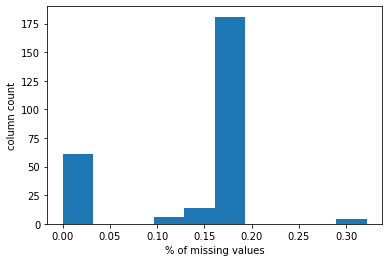

In [656]:
# hist before updating the dataframe
hist_nan(azdias, axis=0)

In [657]:
azdias.isna().sum().sort_values(ascending = False)[:20]

D19_BANKEN_ONLINE_QUOTE_12     1609
D19_VERSAND_ONLINE_QUOTE_12    1609
D19_KONSUMTYP                  1609
D19_GESAMT_ONLINE_QUOTE_12     1609
KBA05_MAXHERST                  947
KBA05_MOTOR                     947
KBA05_MOD8                      947
KBA05_MOD4                      947
KBA05_MOD3                      947
KBA05_MOD1                      947
KBA05_MAXVORB                   947
KBA05_MAXSEG                    947
KBA05_MAXAH                     947
KBA05_MAXBJ                     947
KBA05_SEG1                      947
KBA05_KW3                       947
KBA05_KW2                       947
KBA05_KRSZUL                    947
KBA05_KRSVAN                    947
KBA05_KRSOBER                   947
dtype: int64

In [658]:
df_feat_summary

,Attribute,type,Value
0,AGER_TYP,categorical,[-1]
1,ALTERSKATEGORIE_GROB,categorical,"[-1, 0]"
2,ALTER_HH,ordinal,[0]
3,ANREDE_KZ,categorical,"[-1, 0]"
4,ANZ_HAUSHALTE_AKTIV,numerical,0
...,...,...,...
302,WOHNDAUER_2008,ordinal,"[-1, 0]"
303,WOHNLAGE,ordinal,[-1]
304,WACHSTUMSGEBIET_NB,ordinal,"[-1, 0]"
305,W_KEIT_KIND_HH,ordinal,"[-1, 0]"


In [659]:
azdias = unkown_mapping(azdias, df_feat_summary)

In [660]:
azdias['AGER_TYP'].unique()

array([nan,  2.,  3.,  0.,  1.])

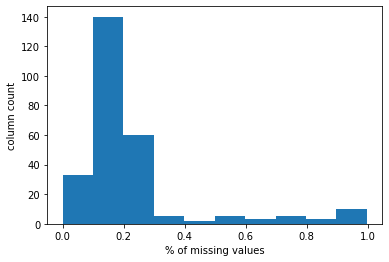

In [661]:
# Histgram after updating the unknown/missing vlaue encoding
hist_nan(azdias, axis=0)

In [662]:
azdias.isna().sum().sort_values(ascending = False)[:20]

TITEL_KZ                     4990
ANZ_TITEL                    4985
D19_TELKO_ONLINE_DATUM       4965
D19_BANKEN_OFFLINE_DATUM     4887
ANZ_HH_TITEL                 4863
D19_TELKO_ANZ_12             4813
D19_BANKEN_ANZ_12            4656
D19_TELKO_ANZ_24             4629
D19_VERSI_ANZ_12             4621
D19_TELKO_OFFLINE_DATUM      4583
D19_BANKEN_ANZ_24            4455
D19_VERSI_ANZ_24             4381
D19_BANKEN_ONLINE_DATUM      4107
AGER_TYP                     3896
D19_BANKEN_DATUM             3838
D19_TELKO_DATUM              3743
D19_VERSAND_OFFLINE_DATUM    3669
D19_VERSAND_ANZ_12           3647
D19_GESAMT_ANZ_12            3366
D19_VERSAND_ANZ_24           3271
dtype: int64

In [663]:
# Check if the dataframe still contain any strings or any other non-numeric values 
for col in azdias.columns:
    if any(isinstance(y,(str)) for y in azdias[col].unique()):  
        print('{:}, {:}'.format( col , azdias[col].unique()))

CAMEO_DEUG_2015, [nan '8' '4' '2' '6' '1' '9' '5' '7' '3' 'X']
OST_WEST_KZ, [nan 'W' 'O']


In [664]:
# Unknown of some features are encoded as 'X' or 'XX', replace them as np.nan, we will convert the others 
azdias.replace(['X','XX'], np.nan, inplace=True)

### Drop rows and columns if nan's exceedes the threshold

In [665]:
threshold = 0.3
azdias = drop_columns(azdias, threshold = 0.3)
azdias = drop_rows(azdias, threshold = 0.3)
feature_count(azdias)

Demographics data file contains 233 features


In [666]:
column_to_keep = azdias.columns 
feature_count(azdias)

Demographics data file contains 233 features


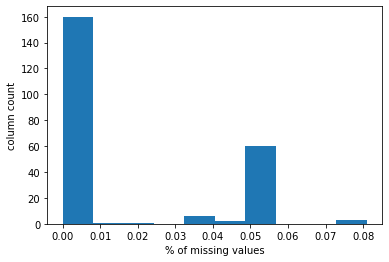

In [667]:
hist_nan(azdias, axis=0)

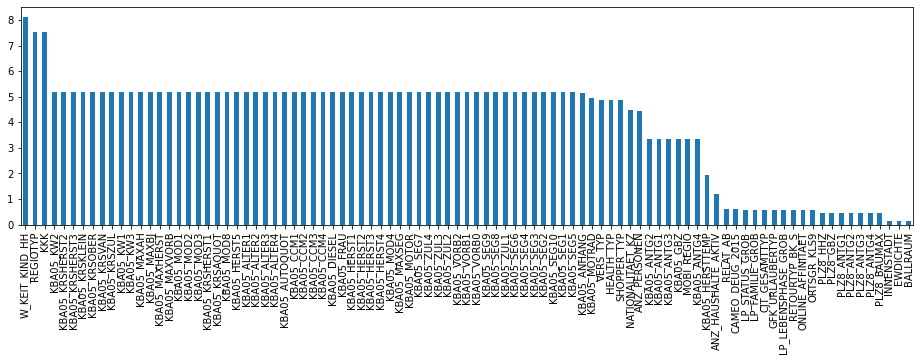

In [668]:
azdias_nan  = azdias.isna().mean() * 100 #portion of NaN
azdias_nan_ = azdias_nan.loc[azdias_nan>0]
azdias_nan_.sort_values(ascending = False).plot(kind = 'bar', figsize = (16,4))

In [669]:
# after processing the data, the portion of np.nan is at the maximum 8-9% 

In [670]:
df_feat_summary

,Attribute,type,Value
0,AGER_TYP,categorical,[-1]
1,ALTERSKATEGORIE_GROB,categorical,"[-1, 0]"
2,ALTER_HH,ordinal,[0]
3,ANREDE_KZ,categorical,"[-1, 0]"
4,ANZ_HAUSHALTE_AKTIV,numerical,0
...,...,...,...
302,WOHNDAUER_2008,ordinal,"[-1, 0]"
303,WOHNLAGE,ordinal,[-1]
304,WACHSTUMSGEBIET_NB,ordinal,"[-1, 0]"
305,W_KEIT_KIND_HH,ordinal,"[-1, 0]"
